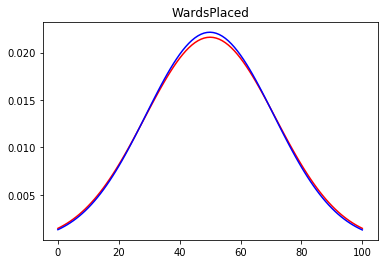

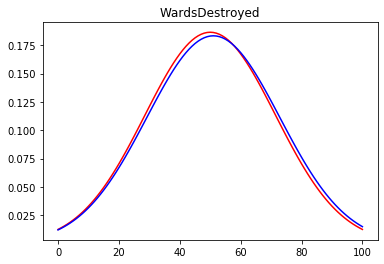

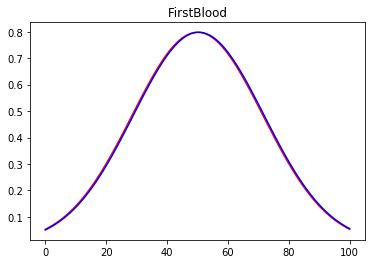

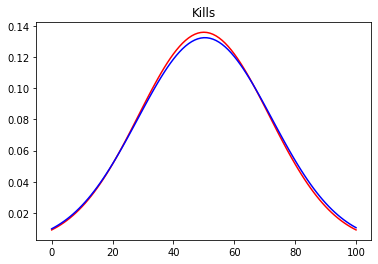

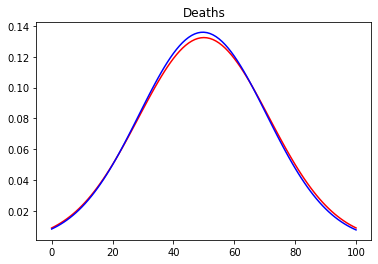

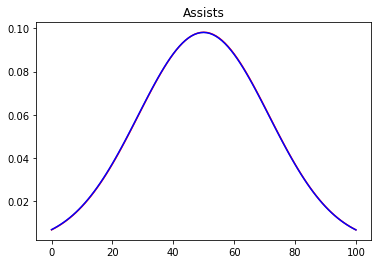

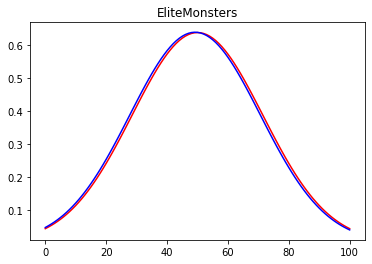

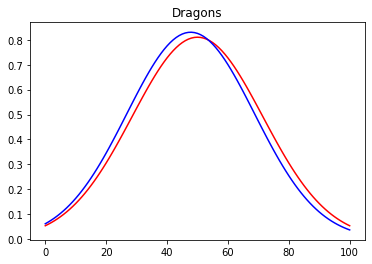

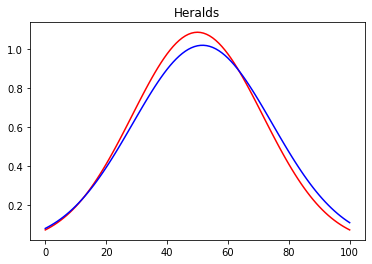

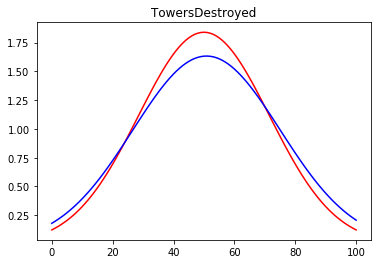

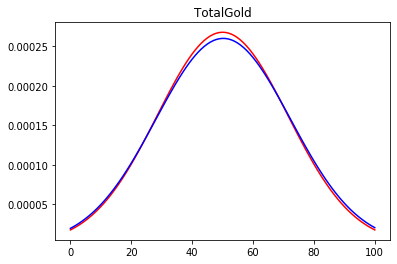

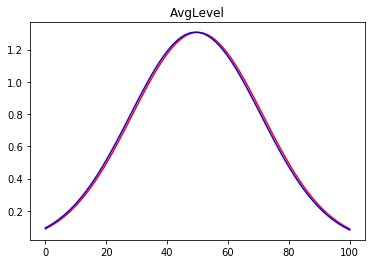

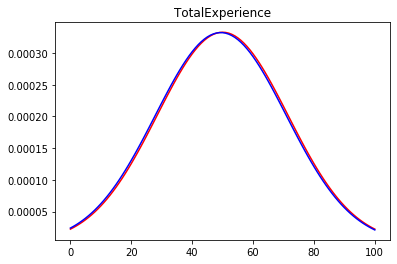

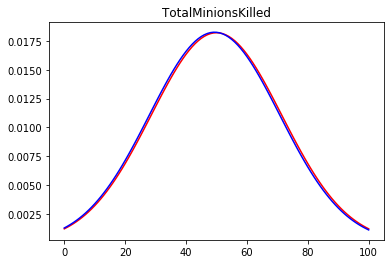

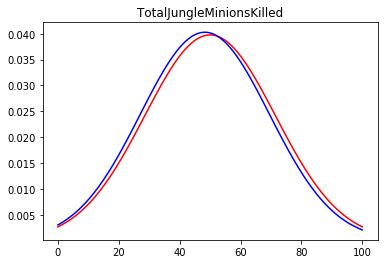

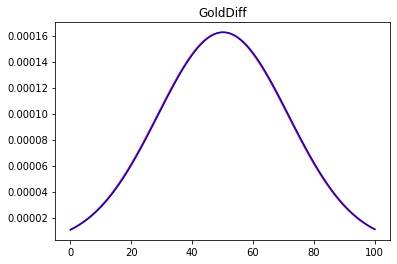

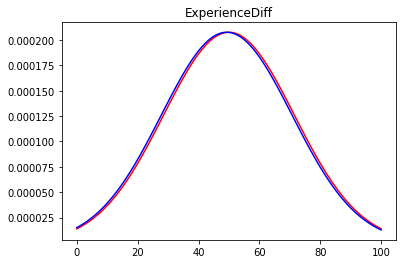

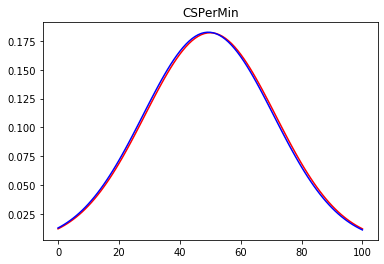

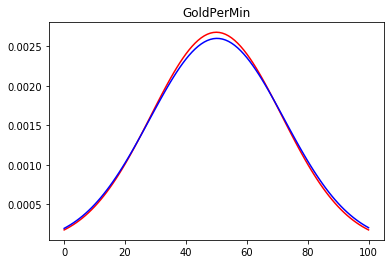

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math


#reads dataset in from kaggle into pandas
lol_data=pd.read_csv("data/high_diamond_ranked_10min.csv")


red_data=lol_data.drop(['gameId','blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin'], axis=1)
blue_data=lol_data.drop(['gameId','blueWins','redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills',
       'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff',
       'redCSPerMin', 'redGoldPerMin'], axis=1)




#graphs normal distributions
for idx in range(len(red_data.columns)):
    fig1, ax1=plt.subplots(1,1)
    red_dist=stats.norm(red_data.iloc[:,idx].mean(), red_data.iloc[:,idx].std())
    blue_dist=stats.norm(blue_data.iloc[:,idx].mean(), blue_data.iloc[:,idx].std())
    x_range=np.linspace(red_dist.ppf(0.01), red_dist.ppf(0.99),101)
    ax1.plot(red_dist.pdf(x_range), color="red")
    ax1.plot(blue_dist.pdf(x_range), color="blue")
    ax1.set_title(label=red_data.columns[idx][3:])
    plt.show()

In [2]:
#creates Dataframe of pvalues and t statistics
tstats=[]
pvals=[]
for idx in range(len(red_data.columns)):
    tstat, pval=stats.ttest_ind(red_data.iloc[:,idx], blue_data.iloc[:,idx])
    tstats.append(tstat)
    pvals.append(pval)

new_names=[]
for col in red_data.columns:
    new_names.append(col[3:])
   
df=pd.DataFrame(list(zip(tstats, pvals)), index=new_names, columns=["T-stat", "P-value"])
print(df)

                            T-stat       P-value
WardsPlaced               0.306964  7.588740e-01
WardsDestroyed           -3.315078  9.178251e-04
FirstBlood               -1.351700  1.764869e-01
Kills                    -1.093698  2.741007e-01
Deaths                    1.093698  2.741007e-01
Assists                   0.294196  7.686110e-01
EliteMonsters             2.602476  9.262244e-03
Dragons                   7.384131  1.595418e-13
Heralds                  -5.182515  2.210671e-07
TowersDestroyed          -2.555721  1.060421e-02
TotalGold                -0.669415  5.032388e-01
AvgLevel                  2.144327  3.201884e-02
TotalExperience           1.969805  4.887465e-02
TotalMinionsKilled        2.086317  3.696271e-02
TotalJungleMinionsKilled  5.667375  1.470231e-08
GoldDiff                 -0.825848  4.089004e-01
ExperienceDiff            2.460867  1.386866e-02
CSPerMin                  2.086317  3.696271e-02
GoldPerMin               -0.669415  5.032388e-01
